In [1]:
from differentiable_lensing import DifferentiableLensing
import torch
import matplotlib.pyplot as plt

grid_shape = 16
resolution = 0.101*4

lensing_module = DifferentiableLensing('cpu', target_resolution=resolution, target_shape=grid_shape, alpha=None)
alpha_r = 0.75
_, _, theta_x, theta_y = lensing_module.make_center_grid(-resolution* grid_shape / 2.0, resolution * grid_shape / 2.0, grid_shape)
theta_x, theta_y = theta_x.unsqueeze(0), theta_y.unsqueeze(0)
_, _, theta_x_log, theta_y_log = lensing_module.make_log_grid(-resolution* grid_shape / 2.0, resolution * grid_shape / 2.0, grid_shape, c=4.5)
theta_x_log, theta_y_log = theta_x_log.unsqueeze(0), theta_y_log.unsqueeze(0)
alpha_unlog = lensing_module.construct_sis(theta_x, theta_y, alpha_r)
beta_x_unlog, beta_y_unlog = lensing_module.backward_lensing(theta_x, theta_y, alpha_unlog)
beta_x_unlog_forward, beta_y_unlog_forward = lensing_module.forward_lensing(theta_x, theta_y, alpha_unlog)
alpha = lensing_module.construct_sis(theta_x_log, theta_y_log, alpha_r)
beta_x, beta_y = lensing_module.backward_lensing(theta_x_log, theta_y_log, alpha)

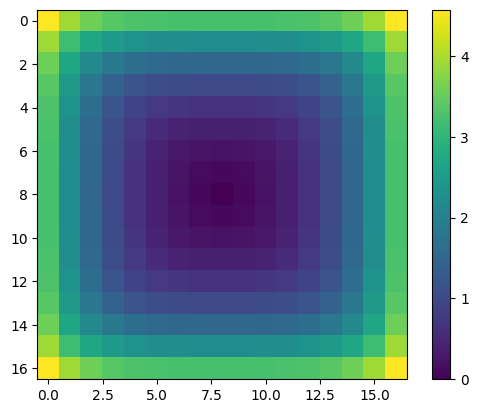

In [2]:
theta_r_log = (theta_x_log**2 + theta_y_log**2).sqrt()
plt.imshow(theta_r_log[0])
plt.colorbar()
theta_x_log, theta_y_log = theta_x_log[0], theta_y_log[0]

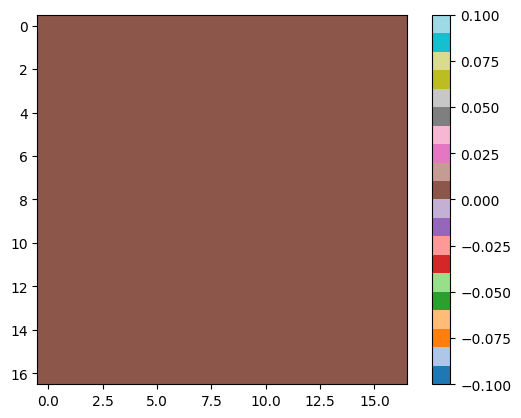

In [3]:
theta_r_log_flip = theta_r_log.flip(dims=[-1])
theta_r_log_flip_2 = theta_r_log.flip(dims=[-2])
plt.imshow((theta_r_log_flip[0] - theta_r_log[0]).abs() + (theta_r_log_flip_2[0] - theta_r_log[0]).abs(), cmap='tab20')
plt.colorbar()

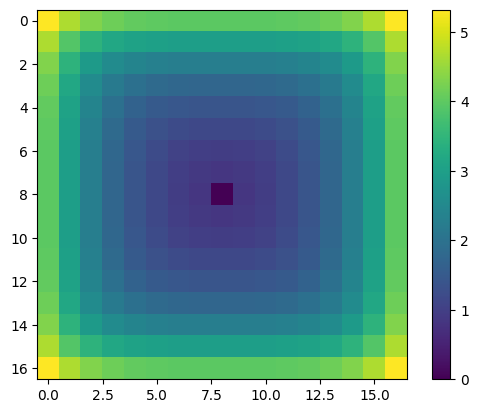

In [4]:
beta_r = (beta_x**2 + beta_y**2).sqrt()
plt.imshow(beta_r[0])
plt.colorbar()

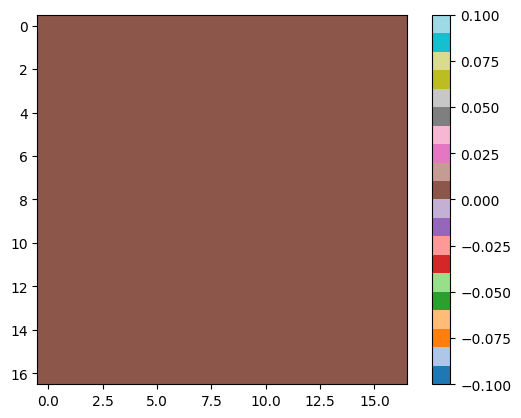

In [5]:
beta_r_flip = beta_r.flip(dims=[-1])
beta_r_flip_2 = beta_r.flip(dims=[-2])
plt.imshow((beta_r_flip[0] - beta_r[0]).abs() + (beta_r_flip_2[0] - beta_r[0]).abs(), cmap='tab20')
plt.colorbar()

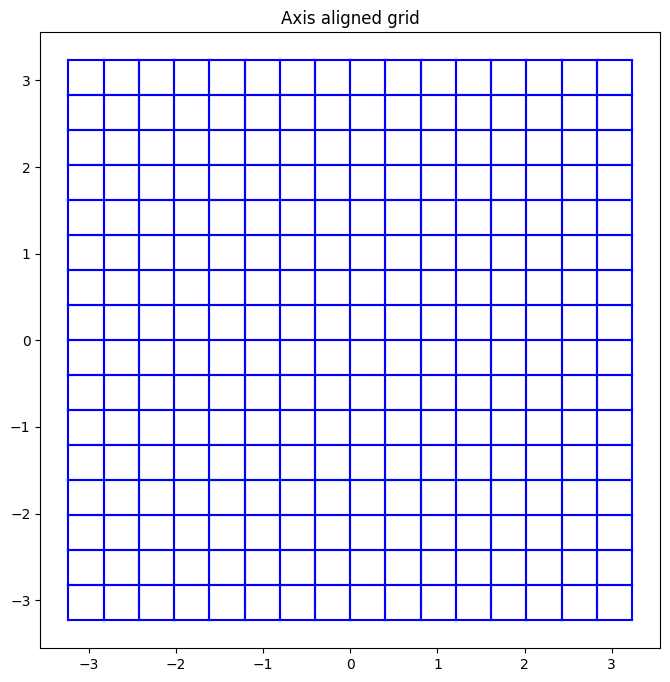

In [6]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
theta_x, theta_y = theta_x[0], theta_y[0]
beta_x, beta_y = beta_x[0], beta_y[0]

axes.plot([theta_x[1:, :-1].flatten(), theta_x[1:, 1:].flatten()], [theta_y[1:, :-1].flatten(), theta_y[1:, 1:].flatten()], c='blue')
axes.plot([theta_x[1:, 1:].flatten(), theta_x[:-1, 1:].flatten()], [theta_y[1:, 1:].flatten(), theta_y[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x[:-1, 1:].flatten(), theta_x[:-1, :-1].flatten()], [theta_y[:-1, 1:].flatten(), theta_y[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x[:-1, :-1].flatten(), theta_x[1:, :-1].flatten()], [theta_y[:-1, :-1].flatten(), theta_y[1:, :-1].flatten()], c='blue')
axes.set_title('Axis aligned grid')
plot.savefig('lingrid.pdf')
print()

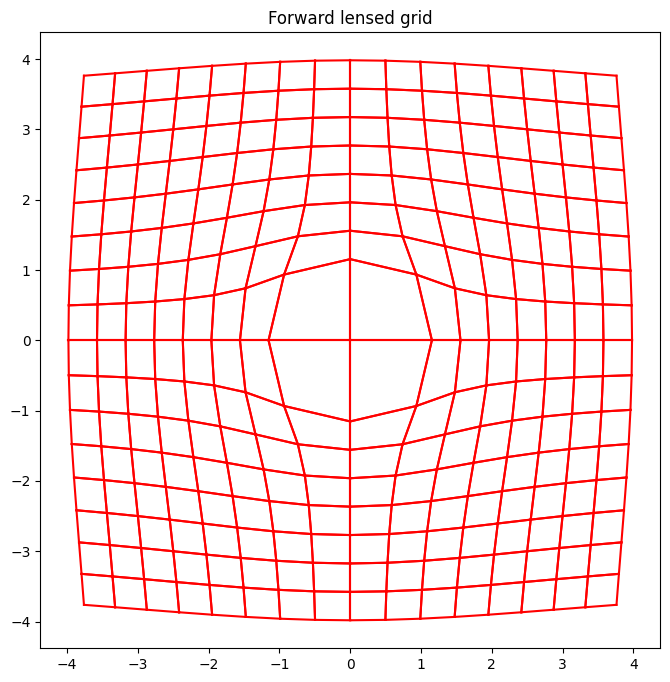

In [7]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
beta_x_unlog, beta_y_unlog = beta_x_unlog[0], beta_y_unlog[0]
axes.plot([beta_x_unlog[1:, :-1].flatten(), beta_x_unlog[1:, 1:].flatten()], [beta_y_unlog[1:, :-1].flatten(), beta_y_unlog[1:, 1:].flatten()], c='red')
axes.plot([beta_x_unlog[1:, 1:].flatten(), beta_x_unlog[:-1, 1:].flatten()], [beta_y_unlog[1:, 1:].flatten(), beta_y_unlog[:-1, 1:].flatten()], c='red')
axes.plot([beta_x_unlog[:-1, 1:].flatten(), beta_x_unlog[:-1, :-1].flatten()], [beta_y_unlog[:-1, 1:].flatten(), beta_y_unlog[:-1, :-1].flatten()], c='red')
axes.plot([beta_x_unlog[:-1, :-1].flatten(), beta_x_unlog[1:, :-1].flatten()], [beta_y_unlog[:-1, :-1].flatten(), beta_y_unlog[1:, :-1].flatten()], c='red')
axes.set_title('Forward lensed grid')
# plot.savefig('linforward.pdf')
print()

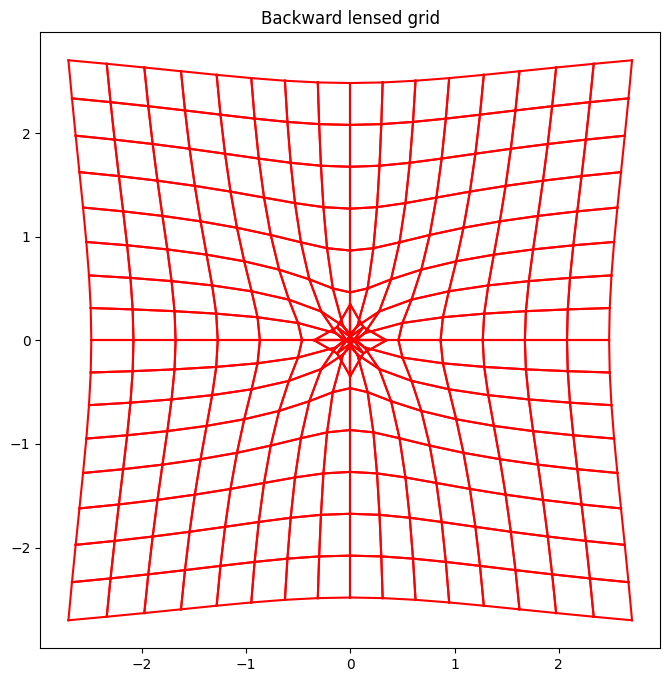

In [8]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
beta_x_unlog_forward, beta_y_unlog_forward = beta_x_unlog_forward[0], beta_y_unlog_forward[0]
axes.plot([beta_x_unlog_forward[1:, :-1].flatten(), beta_x_unlog_forward[1:, 1:].flatten()], [beta_y_unlog_forward[1:, :-1].flatten(), beta_y_unlog_forward[1:, 1:].flatten()], c='red')
axes.plot([beta_x_unlog_forward[1:, 1:].flatten(), beta_x_unlog_forward[:-1, 1:].flatten()], [beta_y_unlog_forward[1:, 1:].flatten(), beta_y_unlog_forward[:-1, 1:].flatten()], c='red')
axes.plot([beta_x_unlog_forward[:-1, 1:].flatten(), beta_x_unlog_forward[:-1, :-1].flatten()], [beta_y_unlog_forward[:-1, 1:].flatten(), beta_y_unlog_forward[:-1, :-1].flatten()], c='red')
axes.plot([beta_x_unlog_forward[:-1, :-1].flatten(), beta_x_unlog_forward[1:, :-1].flatten()], [beta_y_unlog_forward[:-1, :-1].flatten(), beta_y_unlog_forward[1:, :-1].flatten()], c='red')

axes.set_title('Backward lensed grid')
# plot.savefig('linbackward.pdf')
print()

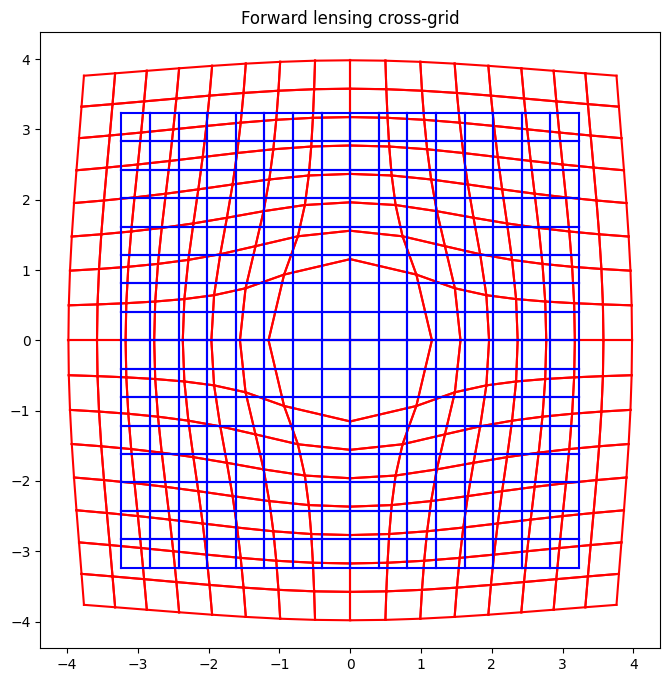

In [9]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
axes.plot([beta_x_unlog[1:, :-1].flatten(), beta_x_unlog[1:, 1:].flatten()], [beta_y_unlog[1:, :-1].flatten(), beta_y_unlog[1:, 1:].flatten()], c='red')
axes.plot([beta_x_unlog[1:, 1:].flatten(), beta_x_unlog[:-1, 1:].flatten()], [beta_y_unlog[1:, 1:].flatten(), beta_y_unlog[:-1, 1:].flatten()], c='red')
axes.plot([beta_x_unlog[:-1, 1:].flatten(), beta_x_unlog[:-1, :-1].flatten()], [beta_y_unlog[:-1, 1:].flatten(), beta_y_unlog[:-1, :-1].flatten()], c='red')
axes.plot([beta_x_unlog[:-1, :-1].flatten(), beta_x_unlog[1:, :-1].flatten()], [beta_y_unlog[:-1, :-1].flatten(), beta_y_unlog[1:, :-1].flatten()], c='red')

axes.plot([theta_x[1:, :-1].flatten(), theta_x[1:, 1:].flatten()], [theta_y[1:, :-1].flatten(), theta_y[1:, 1:].flatten()], c='blue')
axes.plot([theta_x[1:, 1:].flatten(), theta_x[:-1, 1:].flatten()], [theta_y[1:, 1:].flatten(), theta_y[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x[:-1, 1:].flatten(), theta_x[:-1, :-1].flatten()], [theta_y[:-1, 1:].flatten(), theta_y[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x[:-1, :-1].flatten(), theta_x[1:, :-1].flatten()], [theta_y[:-1, :-1].flatten(), theta_y[1:, :-1].flatten()], c='blue')
axes.set_title('Forward lensing cross-grid')
print()
# plot.savefig('lincrossforward.pdf')

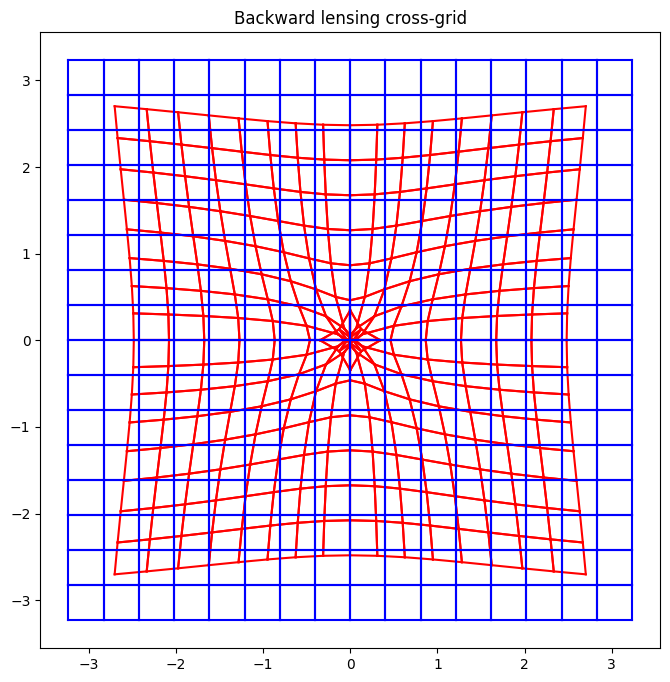

In [10]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
axes.plot([beta_x_unlog_forward[1:, :-1].flatten(), beta_x_unlog_forward[1:, 1:].flatten()], [beta_y_unlog_forward[1:, :-1].flatten(), beta_y_unlog_forward[1:, 1:].flatten()], c='red')
axes.plot([beta_x_unlog_forward[1:, 1:].flatten(), beta_x_unlog_forward[:-1, 1:].flatten()], [beta_y_unlog_forward[1:, 1:].flatten(), beta_y_unlog_forward[:-1, 1:].flatten()], c='red')
axes.plot([beta_x_unlog_forward[:-1, 1:].flatten(), beta_x_unlog_forward[:-1, :-1].flatten()], [beta_y_unlog_forward[:-1, 1:].flatten(), beta_y_unlog_forward[:-1, :-1].flatten()], c='red')
axes.plot([beta_x_unlog_forward[:-1, :-1].flatten(), beta_x_unlog_forward[1:, :-1].flatten()], [beta_y_unlog_forward[:-1, :-1].flatten(), beta_y_unlog_forward[1:, :-1].flatten()], c='red')
axes.plot([theta_x[1:, :-1].flatten(), theta_x[1:, 1:].flatten()], [theta_y[1:, :-1].flatten(), theta_y[1:, 1:].flatten()], c='blue')
axes.plot([theta_x[1:, 1:].flatten(), theta_x[:-1, 1:].flatten()], [theta_y[1:, 1:].flatten(), theta_y[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x[:-1, 1:].flatten(), theta_x[:-1, :-1].flatten()], [theta_y[:-1, 1:].flatten(), theta_y[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x[:-1, :-1].flatten(), theta_x[1:, :-1].flatten()], [theta_y[:-1, :-1].flatten(), theta_y[1:, :-1].flatten()], c='blue')
axes.set_title('Backward lensing cross-grid')
print()
# plot.savefig('lincrossbackward.pdf')

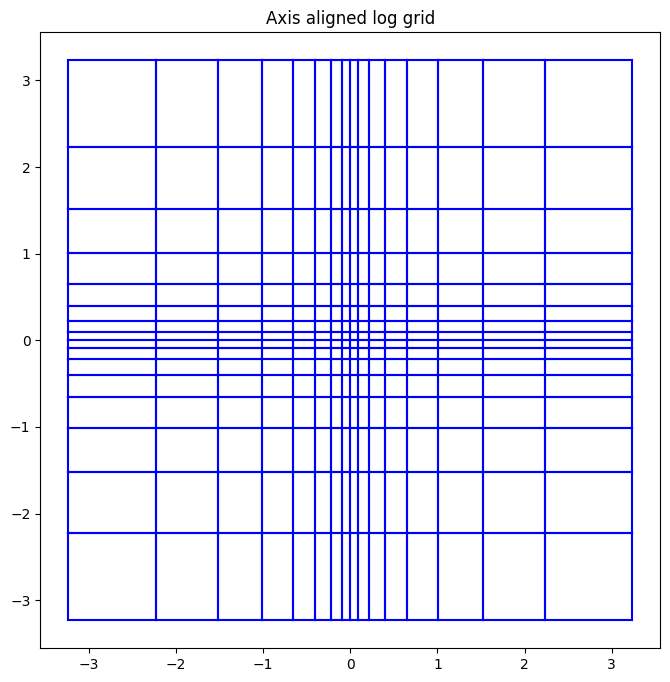

In [11]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)

axes.plot([theta_x_log[1:, :-1].flatten(), theta_x_log[1:, 1:].flatten()], [theta_y_log[1:, :-1].flatten(), theta_y_log[1:, 1:].flatten()], c='blue')
axes.plot([theta_x_log[1:, 1:].flatten(), theta_x_log[:-1, 1:].flatten()], [theta_y_log[1:, 1:].flatten(), theta_y_log[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x_log[:-1, 1:].flatten(), theta_x_log[:-1, :-1].flatten()], [theta_y_log[:-1, 1:].flatten(), theta_y_log[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x_log[:-1, :-1].flatten(), theta_x_log[1:, :-1].flatten()], [theta_y_log[:-1, :-1].flatten(), theta_y_log[1:, :-1].flatten()], c='blue')
axes.set_title('Axis aligned log grid')
plot.savefig('loggrid.pdf')
print()

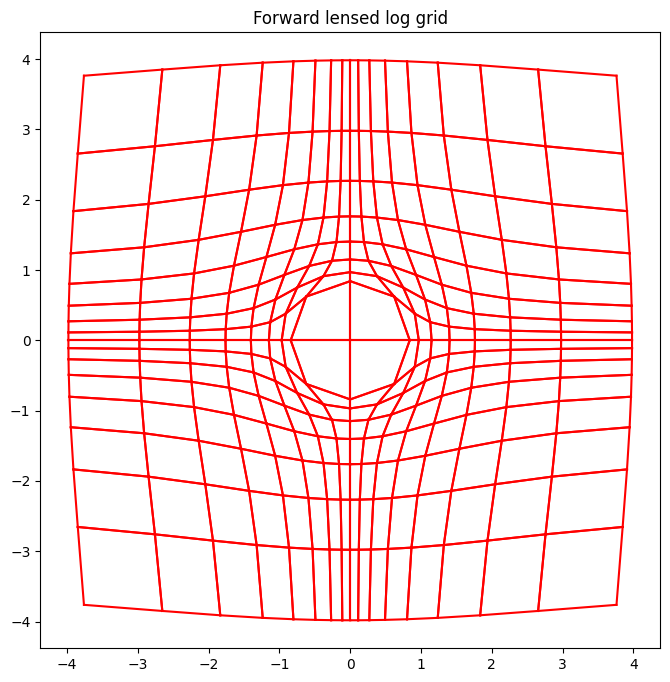

In [12]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
axes.plot([beta_x[1:, :-1].flatten(), beta_x[1:, 1:].flatten()], [beta_y[1:, :-1].flatten(), beta_y[1:, 1:].flatten()], c='red')
axes.plot([beta_x[1:, 1:].flatten(), beta_x[:-1, 1:].flatten()], [beta_y[1:, 1:].flatten(), beta_y[:-1, 1:].flatten()], c='red')
axes.plot([beta_x[:-1, 1:].flatten(), beta_x[:-1, :-1].flatten()], [beta_y[:-1, 1:].flatten(), beta_y[:-1, :-1].flatten()], c='red')
axes.plot([beta_x[:-1, :-1].flatten(), beta_x[1:, :-1].flatten()], [beta_y[:-1, :-1].flatten(), beta_y[1:, :-1].flatten()], c='red')
axes.set_title('Forward lensed log grid')
plot.savefig('logforward.pdf')
print()

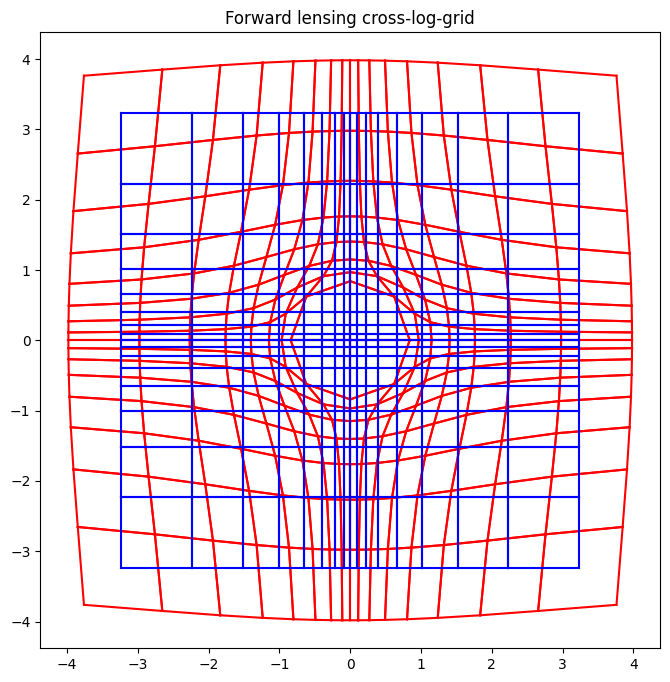

In [13]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
axes.plot([beta_x[1:, :-1].flatten(), beta_x[1:, 1:].flatten()], [beta_y[1:, :-1].flatten(), beta_y[1:, 1:].flatten()], c='red')
axes.plot([beta_x[1:, 1:].flatten(), beta_x[:-1, 1:].flatten()], [beta_y[1:, 1:].flatten(), beta_y[:-1, 1:].flatten()], c='red')
axes.plot([beta_x[:-1, 1:].flatten(), beta_x[:-1, :-1].flatten()], [beta_y[:-1, 1:].flatten(), beta_y[:-1, :-1].flatten()], c='red')
axes.plot([beta_x[:-1, :-1].flatten(), beta_x[1:, :-1].flatten()], [beta_y[:-1, :-1].flatten(), beta_y[1:, :-1].flatten()], c='red')

axes.plot([theta_x_log[1:, :-1].flatten(), theta_x_log[1:, 1:].flatten()], [theta_y_log[1:, :-1].flatten(), theta_y_log[1:, 1:].flatten()], c='blue')
axes.plot([theta_x_log[1:, 1:].flatten(), theta_x_log[:-1, 1:].flatten()], [theta_y_log[1:, 1:].flatten(), theta_y_log[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x_log[:-1, 1:].flatten(), theta_x_log[:-1, :-1].flatten()], [theta_y_log[:-1, 1:].flatten(), theta_y_log[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x_log[:-1, :-1].flatten(), theta_x_log[1:, :-1].flatten()], [theta_y_log[:-1, :-1].flatten(), theta_y_log[1:, :-1].flatten()], c='blue')
axes.set_title('Forward lensing cross-log-grid')
plot.savefig('logcrossforward.pdf')
print()

In [14]:
grid_shape = 64
resolution = 0.101

lensing_module = DifferentiableLensing('cpu', target_resolution=resolution, target_shape=grid_shape, alpha=None)
alpha_r = 0.75
_, _, theta_x, theta_y = lensing_module.make_center_grid(-resolution* grid_shape / 2.0, resolution * grid_shape / 2.0, grid_shape)
theta_x, theta_y = theta_x.unsqueeze(0), theta_y.unsqueeze(0)
_, _, theta_x_log, theta_y_log = lensing_module.make_log_grid(-resolution* grid_shape / 2.0, resolution * grid_shape / 2.0, grid_shape, c=4.5)
theta_x_log, theta_y_log = theta_x_log.unsqueeze(0), theta_y_log.unsqueeze(0)
alpha = lensing_module.construct_sis(theta_x_log, theta_y_log, alpha_r)
beta_x, beta_y = lensing_module.backward_lensing(theta_x_log, theta_y_log, alpha)

In [15]:
beta_x, beta_y = beta_x[0], beta_y[0]
theta_x_log, theta_y_log = theta_x_log[0], theta_y_log[0]

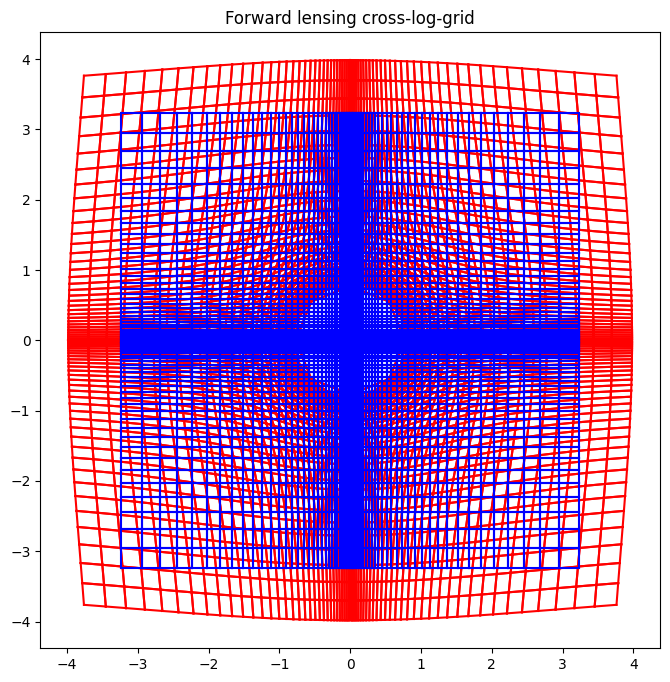

In [16]:
plot, axes = plt.subplots(1,1)
plot.set_size_inches(8, 8)
axes.plot([beta_x[1:, :-1].flatten(), beta_x[1:, 1:].flatten()], [beta_y[1:, :-1].flatten(), beta_y[1:, 1:].flatten()], c='red')
axes.plot([beta_x[1:, 1:].flatten(), beta_x[:-1, 1:].flatten()], [beta_y[1:, 1:].flatten(), beta_y[:-1, 1:].flatten()], c='red')
axes.plot([beta_x[:-1, 1:].flatten(), beta_x[:-1, :-1].flatten()], [beta_y[:-1, 1:].flatten(), beta_y[:-1, :-1].flatten()], c='red')
axes.plot([beta_x[:-1, :-1].flatten(), beta_x[1:, :-1].flatten()], [beta_y[:-1, :-1].flatten(), beta_y[1:, :-1].flatten()], c='red')

axes.plot([theta_x_log[1:, :-1].flatten(), theta_x_log[1:, 1:].flatten()], [theta_y_log[1:, :-1].flatten(), theta_y_log[1:, 1:].flatten()], c='blue')
axes.plot([theta_x_log[1:, 1:].flatten(), theta_x_log[:-1, 1:].flatten()], [theta_y_log[1:, 1:].flatten(), theta_y_log[:-1, 1:].flatten()], c='blue')
axes.plot([theta_x_log[:-1, 1:].flatten(), theta_x_log[:-1, :-1].flatten()], [theta_y_log[:-1, 1:].flatten(), theta_y_log[:-1, :-1].flatten()], c='blue')
axes.plot([theta_x_log[:-1, :-1].flatten(), theta_x_log[1:, :-1].flatten()], [theta_y_log[:-1, :-1].flatten(), theta_y_log[1:, :-1].flatten()], c='blue')
axes.set_title('Forward lensing cross-log-grid')
plot.savefig('logcrossforward_64.pdf')
print()